In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Tensors basics

## [OTHER TITLE] 1D Tensors

### Methods to construct tensors

#### Long tensors (int/long)

In [ ]:
# Build tensor of type Long
a = torch.tensor([1, 2, 3, 4])  # use integers only
a = torch.tensor([1., 2., 3., 4.], dtype=torch.int64)  # LongTensor with int64
a = torch.tensor([1., 2., 3., 4.], dtype=torch.int32)  # IntTensor with int32

#### Float tensors (float/double)

In [ ]:
# Build float tensors
a = torch.tensor([1, 2, 3], dtype=float)  # DoubleTensor with float64
a = torch.tensor([1, 2, 3], dtype=torch.float64)  # DoubleTensor with float64

a = torch.tensor([1, 2, 3], dtype=torch.float32)  # FloatTensor with float32
b = torch.tensor([1, 2, 3]).float()  # FloatTensor with float32
a = torch.FloatTensor([1, 2, 3])  # FloatTensor with float32

# transform tensor into float
a = a.type(torch.FloatTensor)  # FloatTensor with float32

### Get informations

In [ ]:
# Dimensions
a.shape
a.size()  # idem
a.ndimension()  # rank

# Types
a.type()  # type of Tensor
a.dtype  # type of data within Tensor

### Transformations

#### Transform shape

In [ ]:
# initial shape (3)

# Transform in shape (3, 1)
a.view(3,1).shape
a.view(-1, 1).shape  # Idem

# Transform in shape (1, 3)
a.view(1, 3).shape
a.view(1, -1).shape

#### Transform object type

In [ ]:
# Numpy & Torch
# -------------
numpy_arr = np.array([1, 2, 3])

# Numpy => Torch
tensor = torch.from_numpy(numpy_arr)

# Torch => Numpy
numpy_arr = tensor.numpy()

# ps: these are pointers, any change is 
# repercuted on the other variables

In [ ]:
# Pandas & Torch
# --------------
pd_series = pd.Series([1, 2, 3])

# Pandas => Torch
tensor = torch.from_numpy(pd_series.values)

# Torch => Pandas
pd_series = pd.Series(tensor)

In [ ]:
# Lists & Tensor
# --------------

# List => Tensor
tensor = torch.tensor(dumb_list)

# Tensor => List
dumb_list = tensor.tolist()

### Indexing

In [ ]:
# Multiple indexing
print(tensor)  # (1, 2, 3)
tensor[:2] = torch.tensor([100, 200])  # (100, 200, 3)

### Basic math operations

In [ ]:
# Addition, substraction, etc. are element-wise operations
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
z = a + b

a + 1  # Broadcasting

# Scalar multiplication and division too
a*2
a/2

In [ ]:
# Vector multiplication
a * b  # element-wise
torch.dot(a, b) # Dot product (matrix mult)

In [ ]:
# Mean (must be float)
float_tensor = torch.tensor([1, 2, 3]).float()
float_tensor.mean()

# Max, min
tensor.max()

In [ ]:
# Tensor in radians
tensor_radians = torch.tensor([0, np.pi/2, np.pi])

# Sinus
tensor_radians.sin()

# Generate seq
torch.linspace(-2, 2, steps=5)
print(torch.linspace(-2, 2, steps=4))

### Masks

In [ ]:
# Get indexes for True elements
bool_tensor = torch.tensor([False, False, True, False, True])
bool_tensor.nonzero()

# Graphs and Differenciation

Methodology to differenciate

In [ ]:
# Simple derivative
x = torch.tensor(2., requires_grad=True)
y = x**2
y.backward()  # compute derivative of y
x.grad  # evaluate the value of x

In [ ]:
# Partial derivatives
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
z = x * y + x**2
z.backward()
x.grad  # partial derivative of z with regard to x
y.grad  # partial derivative of z with regard to y

Fundamental properties

In [ ]:
# Inspect x and y equally
x.data
x.grad_fn
x.grad
x.is_leaf
x.requires_grad

# Frequent tools

In [ ]:
# import torchvision.transforms as transforms
# import torchvision.datasets as datasets

In [ ]:
dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

# Linear Regression

Lowest level implementation

In [333]:
# Set data
x = torch.arange(-3, 3, 0.1).view(-1, 1)
y = (-3 * x) + (3 * np.sin(x)) + (.5 * torch.randn(x.size()))

# Initialize parameters
w = torch.tensor(-10., requires_grad=True)
b = torch.tensor(-1., requires_grad=True)

# Set hyper-parameters
lr = 0.03
n_epochs = 12

In [334]:
def forward(x):
    return w * x + b

def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

list_cost = []
for epoch in range(n_epochs):
    y_hat = forward(x)  # predict
    loss = criterion(y_hat, y)  # compute cost
    loss.backward()  # compute derivatives
    w.data = w.data - lr * w.grad.data  # backpropagate
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()  # reset grad for next iter
    b.grad.data.zero_()
    list_cost.append(loss.item())

[]

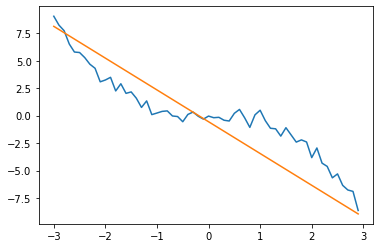

In [335]:
plt.plot(x.numpy(), y)  # Plot data
plt.plot(x.numpy(), y_hat.data.numpy())  # Plot estimated line
plt.plot()

[]

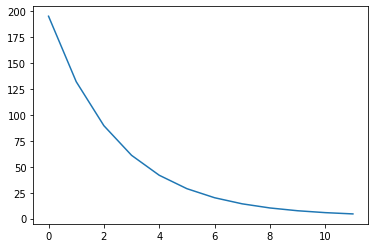

In [337]:
# Plot loss evolution (average cost)
plt.plot(list_cost)
plt.plot()

Using Torch.Linear

In [ ]:
from torch.nn import Linear

# Initialize the linear model
model = Linear(in_features=1, out_features=1) # Slope (w) and bias (b) are randomly initialized

# Predict
y_hat = model(x)

Parameters info

In [ ]:
# Get parameters names and values
print('\n', model.state_dict())

# Get parameters' name only
print(*model.state_dict())
print(model.state_dict().keys())

# Get parameters' values only (+ requires_grad info)
print(list(model.parameters()))

# Get parameters' value distinctly
model.state_dict()['linear.weight'].data[0]
model.state_dict()['linear.bias'].data[0]

Compute derivative and update gradients

In [ ]:
# Compute derivative
y_hat.backward()

# Compute error and update gradients
error = y_hat - y_truth
w_new = w -lr * error * w.grad
b_new = b -lr * error * b.grad

# Print error improvement
print("previous error", abs(y_hat - y_truth))
print("new error", abs((w_new * x + b_new) - y_truth))

# Custom Modules

In [ ]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
model = LR(1, 1)
y_hat = model(x)